### 📘 Prior Knowledge Assumed for This Course

Here’s a list of the **prior knowledge** assumed for this course:

- Familiarity with the foundational concepts from **Part 1 of the course**, especially in **deep learning**
- Basic understanding of **Jupyter notebooks** and how to run code in them
- Comfort with **Python programming**, including:
  - Functions
  - Loops
  - Object-oriented programming
- Knowledge of **key deep learning concepts**, such as:
  - Neural networks
  - Activation functions
  - Loss functions
  - Backpropagation
  - Model training and evaluation
- Basic **math skills**, especially:
  - Linear algebra (e.g., matrices, vectors, dot products)
  - Probability and statistics
  - Calculus (e.g., derivatives, gradients)


## 📘 Summary of the Lesson

- **Introduction to Diffusers library**  
  Tutorial on using pipelines for image generation; highlights features, flexibility, and GPU access options.

- **Advanced Stable Diffusion Features**:
  - Guidance scale (controls prompt strength)
  - Negative prompts (exclude concepts)
  - Image initialization (start from an image)
  - Textual inversion & Dreambooth (add custom concepts)

- **Core Stable Diffusion Concepts Explained**:
  - CLIP embeddings
  - Variational Autoencoder (VAE)
  - Noise prediction using U-Net
  - Noise removal using schedulers

- **Theoretical Foundation**  
  Intuitive explanation using finite differencing and analytic derivatives; shows how diffusion models generate images.

- **Additional Topics Covered**:
  - Autoencoders, U-Nets
  - Text and image encoding
  - Similarities between diffusion models and deep learning optimizers
  - Discussion of potential research directions


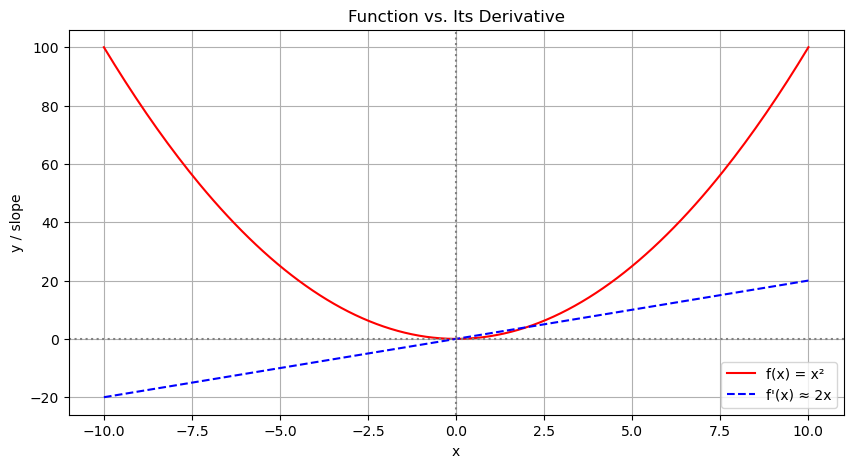

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its numerical derivative
def f(x):
    return x**2

def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h  # finite difference approximation

# Generate x values and compute y and slope
x = np.linspace(-10, 10, 200)
y = f(x)
dy = numerical_derivative(f, x)

# Plot function and its derivative
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = x²', color='red')
plt.plot(x, dy, label="f'(x) ≈ 2x", color='blue', linestyle='--')
plt.axhline(0, color='gray', linestyle=':')
plt.axvline(0, color='gray', linestyle=':')
plt.legend()
plt.title("Function vs. Its Derivative")
plt.xlabel("x")
plt.ylabel("y / slope")
plt.grid(True)
plt.show()


情境

![][image1]

原理：

{預測雜訊=\>驗證=\>消除雜訊}=\>循環數次=\>產生最後結果

UNET  
![][image2]

Let’s look at the input and output of the Unet.

Input \- somewhat noisy image, it could be no noisy at all or it could be all noise

Output \- noise

So if we subtract the output from the input we end up with an approximation of the unnoisy image

## **Typical Use Cases:**

* Medical image segmentation (e.g., identifying tumors)

* Satellite image analysis

* Autonomous driving (lane detection, road segmentation)

* Background removal

* Image inpainting and restoration

VAE \- Variational autoencoders  
![][image3]

We are encoding the “big” image to a much “smaller” representation. This factor of compression makes sense depending on how well we can reconstruct the original image back from these latents of size 64x64x4. So let’s build the inverse process to decode these latents, decoder. And then we can put the encoder and decoder together and train it.

let us update the inputs and outputs of the Unet:

Input \- somewhat noisy latents  
Output \- noise  
Now we can subtract the output from the input to get the denoised latents and pass it to the decoder of theautoencoder to get the best approximation of the denoised version of the image.

This autoencoder in practice is a Variational Autoencoder.

Few points to keep in mind:

The VAE is an optional building block. It has the advantage of training the Unet with smaller size latents rather than images, so it’s faster.  
The encoder of the VAE is only required during training and not during inference.

CLIP  
This pair of models have a name \- CLIP,Contrastive Language-Image Pre-training and the loss we are using is called contrastive loss.

So we’re now passing two things into this model, the image pixels and what digit it is in one hot encoded vector form.

![][image4]

Stable diffusion is a latent diffusion model and what that means is that it doesn’t operate in the pixel space, it operates on in the latent space of some other autoencoder model and in this case that is a variational autoencoder.

![][image5]

Stable diffusion is a latent diffusion model and what that means is that it doesn’t operate in the pixel space, it operates on in the latent space of some other autoencoder model and in this case that is a variational autoencoder.

These gradients that we have are often called the score function.

“Time steps” is the jargon used in a lot of papers but we never used any time steps during our training. This is basically an overhang from how the math was formulated in the initial papers. We will avoid using the term time steps but we can see what time steps are though it’s got nothing to do with time in real life.  
![][image6]

![][image7]  
次數越多，noise 越少

![][image8]

[image1]: <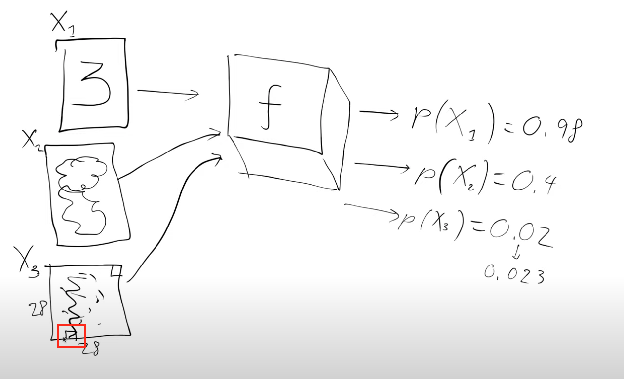>

[image2]: <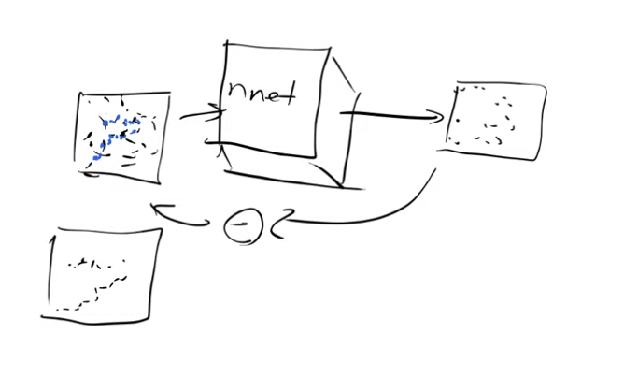>

[image3]: <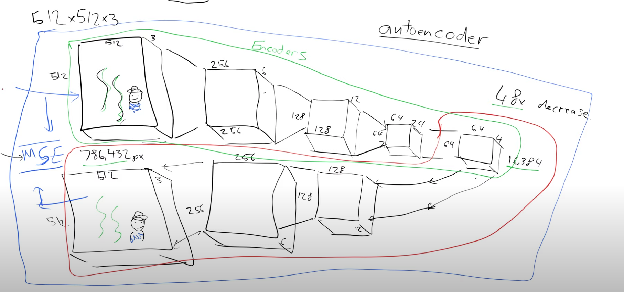>

[image4]: <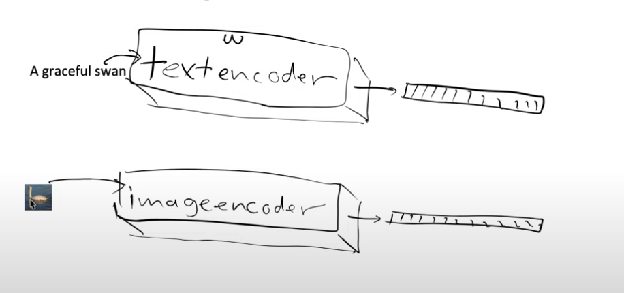>

[image5]: <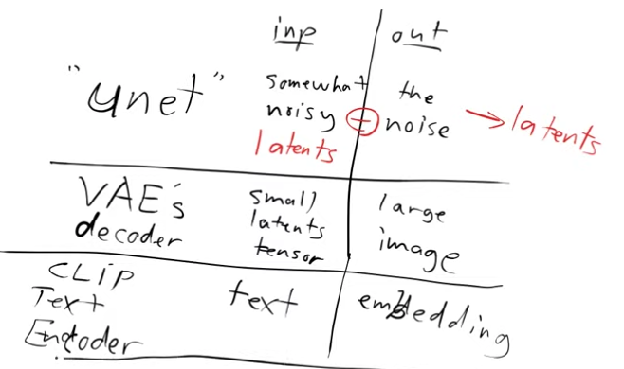>

[image6]: <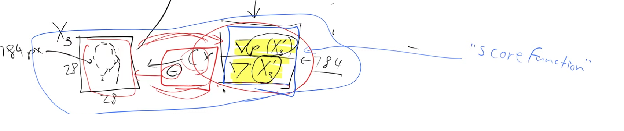>

[image7]: <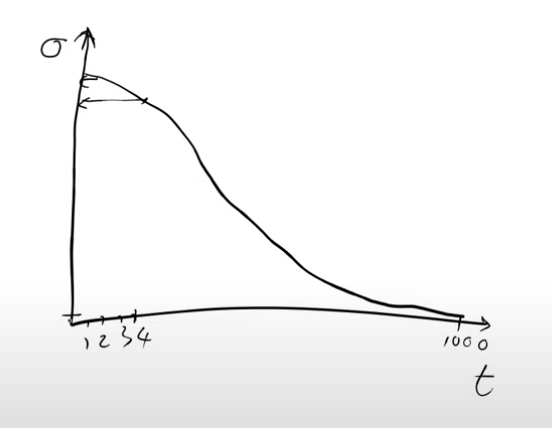>

[image8]: <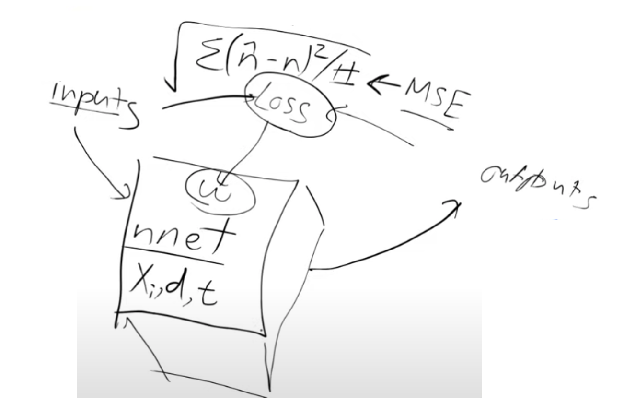>

### 🎥 其他推薦影片

### 📘 Diffusion Model 中文教學影片
由台大李宏毅老師講解（含數學與直觀說明）  
👉 [觀看影片](https://www.youtube.com/@HungyiLeeNTU/search?query=Diffusion)

---

### 🧠 Convolutional Neural Network from Scratch | Mathematics & Python Code
一部結合數學推導與程式碼實作的 CNN 教學影片  
👉 [觀看影片](https://www.youtube.com/watch?v=Lakz2MoHy6o)


### Ken's Note  
👉 [Ken's Note](/edit/ken/Ken_09_diffusion.pdf)

### 📘 微積分重要詞彙中英文對照表

---

### 一、基本詞彙

| 中文     | 英文           |
|----------|----------------|
| 微積分   | Calculus       |
| 微分     | Differentiation |
| 積分     | Integration    |
| 極限     | Limit          |
| 無窮小   | Infinitesimal  |
| 無窮大   | Infinity       |
| 變數     | Variable       |
| 常數     | Constant       |

---

### 二、微分相關

| 中文              | 英文                   |
|-------------------|------------------------|
| 導數              | Derivative             |
| 一階導數          | First derivative       |
| 二階導數          | Second derivative      |
| 偏導數            | Partial derivative     |
| 鏈鎖法則（鏈式法則） | Chain rule             |
| 微分法則          | Rules of differentiation |
| 斜率              | Slope                  |
| 切線              | Tangent                |
| 駝峰點（極值點）  | Critical point         |

---

### 三、積分相關

| 中文                   | 英文                    |
|------------------------|-------------------------|
| 不定積分               | Indefinite integral     |
| 定積分                 | Definite integral       |
| 積分區間               | Interval of integration |
| 積分上限/下限          | Upper/Lower limit of integration |
| 替代積分法             | Substitution method     |
| 分部積分法             | Integration by parts    |
| 面積                   | Area                    |
| 體積                   | Volume                  |

---

### 四、其他重要概念

| 中文            | 英文               |
|-----------------|--------------------|
| 函數            | Function           |
| 連續性          | Continuity         |
| 不連續點        | Discontinuity      |
| 收斂 / 發散     | Convergence / Divergence |
| 麥克勞林級數    | Maclaurin series   |
| 泰勒級數        | Taylor series      |
| 無窮級數        | Infinite series    |
